In [1]:
import pygame

import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

pygame 2.6.1 (SDL 2.28.4, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
class Cell:
    def __init__(self, group, pos):
        self.value = 0 # 0: empty, 1: placed, 2: occupied
        self.group = group
        self.pos = pos
    def __repr__(self):
        return f'pos:{self.pos}, group:{self.group}, value:{self.value}'

class Node:
    def __init__(self, cell, board):
        self.prev_node = None
        self.next_nodes = []
        self.cell = cell
        self.board = board
        pass
      

class Board:
    def __init__(self, group_map):
        self.group_map = group_map  
        self.num_groups = max(max(row) for row in self.group_map) + 1  # maximum value in loaded_board                          
        self.shape = (len(self.group_map), len(self.group_map[0]))
        self.grid = [[Cell(self.group_map[i][j], (j + 1, i + 1)) for j in range(self.shape[1])] for i in range(self.shape[0])]
        self.placed_cells = []
        self.groups = [[] for i in range(self.num_groups)]
        for i in range(self.num_groups):
            self.groups[i] = []
        # print(self.groups)
        # print(len(self.groups))
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                # try:
                self.groups[self.grid[i][j].group].append(self.grid[i][j])
                # except:
                #     print(i, j, self.grid[i][j].group)
        
        cmap_base = plt.get_cmap('gist_rainbow')
        n_color = cmap_base.N
        # Generate color indices for each value from 1 to N
        color_indices = [(n_color / self.num_groups) * v for v in range(1, self.num_groups + 1)]
        colors = [cmap_base(int(idx) % n_color) for idx in color_indices]
        self.custom_cmap = ListedColormap(colors)

        self.init_draw()
        
        return
   
    
    def init_draw(self):
        
        fig, ax = plt.subplots()
        plt.close(fig)
        ax.pcolor(self.group_map, cmap=self.custom_cmap, edgecolors='k', linewidths=1)
        ax.set_axis_off()
        ax.invert_yaxis()
        ax.set_aspect('equal')
        self.ax = ax        
        return 
    
    def check(self):

        pass
    
    def in_board(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        return ((pos[0] >= 0  and pos[0] < self.shape[1]) and (pos[1] >= 0, pos[1] < self.shape[0]))

    def place(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        if (pos[0] < self.shape[1] and pos[1] < self.shape[0]) and (self.grid[pos[0]][pos[1]].value == 0):                     
            occupied_cells = []
            # group occupation
            for c in self.groups[self.grid[pos[0]][pos[1]].group]:
                c.value = 2
                occupied_cells.append(c)                
            # neighborhood occupation
            for shift_x in (-1, 1):
                for shift_y in (-1, 1):
                    pos_shift = (pos[0] + shift_y, pos[1] + shift_x)
                    if (pos_shift[0] >= 0 and pos_shift[0] < self.shape[1]) and (pos_shift[1] >= 0 and pos_shift[1] < self.shape[0]):
                        self.grid[pos_shift[0]][pos_shift[1]].value = 2
                        occupied_cells.append(self.grid[pos_shift[0]][pos_shift[1]])
            # line occupation
            # horizontal
            for c in self.grid[pos[0]]:
                c.value = 2
                occupied_cells.append(c)
            # vertical
            for r in self.grid:
                r[pos[1]].value = 2
                occupied_cells.append(r[pos[1]])
            # cell placement
            self.grid[pos[0]][pos[1]].value = 1            
            self.placed_cells.append(self.grid[pos[0]][pos[1]])
            occupied_cells.append(self.grid[pos[0]][pos[1]])
            # group update            
            # self.groups[self.grid[pos[0]][pos[1]].group].remove(self.grid[pos[0]][pos[1]])
            for c in occupied_cells:
                if c in self.groups[c.group]:
                    self.groups[c.group].remove(c)

        pass

    def remove(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        if self.grid[pos[0]][pos[1]].value == 1:
            if pos[0] < self.shape[1] and pos[1] < self.shape[0]:                     
                released_cells = []
                # remove group occupation
                for c in self.groups[self.grid[pos[0]][pos[1]].group]:
                    c.value = 0
                    released_cells.append(c)
                # remove neighborhood occupation
                for shift_x in (-1, 1):
                    for shift_y in (-1, 1):
                        pos_shift = (pos[0] + shift_y, pos[1] + shift_x)
                        if (pos_shift[0] >= 0 and pos_shift[0] < self.shape[1]) and (pos_shift[1] >= 0 and pos_shift[1] < self.shape[0]):
                            self.grid[pos_shift[0]][pos_shift[1]].value = 0
                            released_cells.append(self.grid[pos_shift[0]][pos_shift[1]])
                # line occupation
                # horizontal
                for c in self.grid[pos[0]]:
                    c.value = 0
                    released_cells.append(c)
                # vertical
                for r in self.grid:
                    r[pos[1]].value = 0
                    released_cells.append(r[pos[1]])
                # cell placement
                # self.grid[pos[0]][pos[1]].value = 1            
                self.placed_cells.remove(self.grid[pos[0]][pos[1]])
                # group update            
                self.groups[self.grid[pos[0]][pos[1]].group].append(self.grid[pos[0]][pos[1]])
                for c in released_cells:
                    if c not in self.groups[c.group]:
                        self.groups[c.group].append(c)
        pass

    def update(self):
 
        pass
    
    def draw(self):
        # plt.clf()
        clear_output(wait=True)
        self.init_draw()
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if self.grid[i][j].value == 1:                    
                    self.ax.plot(j + 0.5, i + 0.5, marker='o', markersize=12, markeredgecolor='black', markerfacecolor='yellow')
                elif self.grid[i][j].value == 2:
                    self.ax.plot(j + 0.5, i + 0.5, marker='x', markersize=12, markeredgecolor='black', markerfacecolor='black')
         
        display(self.ax.figure)
        pass

    def dump(self):
        output = [[[] for j in range(self.shape[1])] for i in range(self.shape[0])]
        for i, r in enumerate(self.grid):            
            for j, c in enumerate(r):
                output[i][j] = c.value
        return output
        

    

In [ ]:
a = [1, 2, 3]
b = [4, 5]
c = [7, 8, 9, 10]
d = [a, c, b]
print(d)
d.sort(key=lambda x: len(x))
print(d)

[[1, 2, 3], [7, 8, 9, 10], [4, 5]]
[[4, 5], [1, 2, 3], [7, 8, 9, 10]]


In [8]:
class test:
    def __init__(self, p):
        self.p = p
    

    def __repr__(self):
        return f"{self.__class__.__name__}({self.p!r})"

a = test('a')
d = test('a')
b = test('b')
c = [a, b, d]
c.remove(a)
print(c)

[test('b'), test('a')]


In [11]:
import json
with open('test_board.json', 'r') as f:
    loaded_board = json.load(f)

print(loaded_board)

[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 3, 2, 2, 2], [0, 4, 5, 5, 2, 2, 2, 2], [0, 5, 5, 5, 5, 2, 2, 2], [5, 5, 5, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6, 7, 7], [6, 6, 6, 6, 6, 6, 6, 6]]


In [23]:
board = Board(loaded_board)

pos_place = (2, 2)
print(f'place on {pos_place}')
board.place(pos_place)
for g in board.groups:
    print(g)    
pos_place = (7, 7)
print(f'place on {pos_place}')
board.place(pos_place)
for g in board.groups:
    print(g) 
# for c in board.groups[7]:
#     c.value = 2
# board.draw()

place on (2, 2)
[]
[pos:(7, 1), group:1, value:0, pos:(8, 1), group:1, value:0]
[pos:(6, 3), group:2, value:0, pos:(7, 3), group:2, value:0, pos:(8, 3), group:2, value:0, pos:(5, 4), group:2, value:0, pos:(6, 4), group:2, value:0, pos:(7, 4), group:2, value:0, pos:(8, 4), group:2, value:0, pos:(6, 5), group:2, value:0, pos:(7, 5), group:2, value:0, pos:(8, 5), group:2, value:0]
[pos:(5, 3), group:3, value:0]
[]
[pos:(3, 4), group:5, value:0, pos:(4, 4), group:5, value:0, pos:(3, 5), group:5, value:0, pos:(4, 5), group:5, value:0, pos:(5, 5), group:5, value:0, pos:(1, 6), group:5, value:0, pos:(3, 6), group:5, value:0]
[pos:(4, 6), group:6, value:0, pos:(5, 6), group:6, value:0, pos:(6, 6), group:6, value:0, pos:(7, 6), group:6, value:0, pos:(8, 6), group:6, value:0, pos:(1, 7), group:6, value:0, pos:(3, 7), group:6, value:0, pos:(4, 7), group:6, value:0, pos:(5, 7), group:6, value:0, pos:(6, 7), group:6, value:0, pos:(1, 8), group:6, value:0, pos:(3, 8), group:6, value:0, pos:(4, 8), g

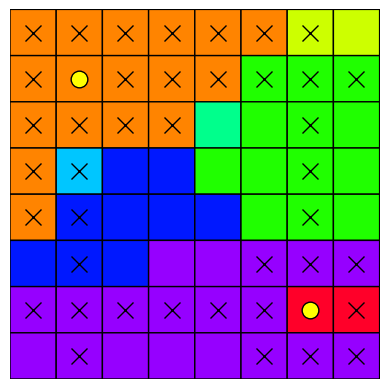

In [24]:
board.draw()

In [26]:
board.group_map

[[0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 2, 2, 2],
 [0, 0, 0, 0, 3, 2, 2, 2],
 [0, 4, 5, 5, 2, 2, 2, 2],
 [0, 5, 5, 5, 5, 2, 2, 2],
 [5, 5, 5, 6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6, 6, 7, 7],
 [6, 6, 6, 6, 6, 6, 6, 6]]

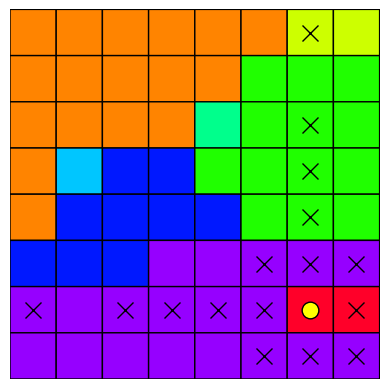

In [ ]:
board.remove((2, 2))
board.dump()
board.draw()

In [ ]:
board.in_board((1, 3))

(True, True)

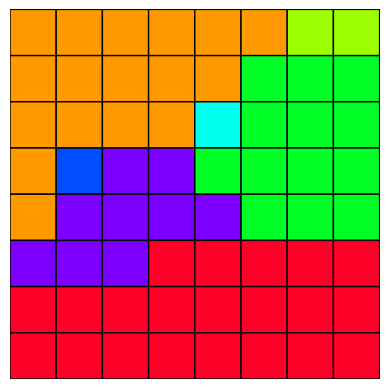

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

N = max(max(row) for row in loaded_board)  # maximum value in loaded_board
cmap_base = plt.get_cmap('gist_rainbow')
n_color = cmap_base.N

# Generate color indices for each value from 1 to N
color_indices = [(n_color / N) * v for v in range(1, N + 1)]
colors = [cmap_base(int(idx) % n_color) for idx in color_indices]

# Add color for 0 if needed (e.g., white or transparent)
# colors = [(1, 1, 1, 1)] + colors  # white for 0

custom_cmap = ListedColormap(colors)
fig, ax = plt.subplots()
ax.pcolor(loaded_board, cmap=custom_cmap, edgecolors='k', linewidths=1)
ax.set_axis_off()
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

In [ ]:
def init_board(group_map):
    N = max(max(row) for row in group_map)  # maximum value in loaded_board
    cmap_base = plt.get_cmap('gist_rainbow')
    n_color = cmap_base.N
    # Generate color indices for each value from 1 to N
    color_indices = [(n_color / N) * v for v in range(1, N + 1)]
    colors = [cmap_base(int(idx) % n_color) for idx in color_indices]
    custom_cmap = ListedColormap(colors)
    fig, ax = plt.subplots()
    ax.pcolor(group_map, cmap=custom_cmap, edgecolors='k', linewidths=1)
    ax.set_axis_off()
    ax.invert_yaxis()
    ax.set_aspect('equal')
    return fig, ax


    

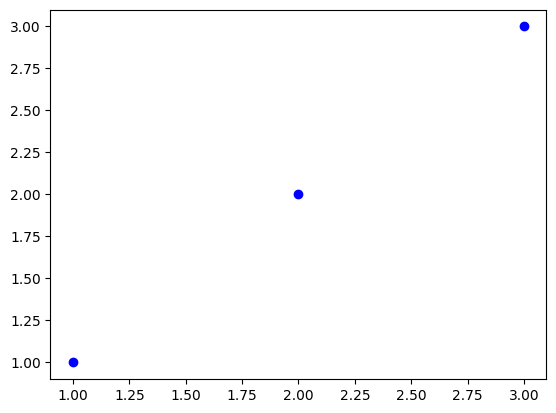

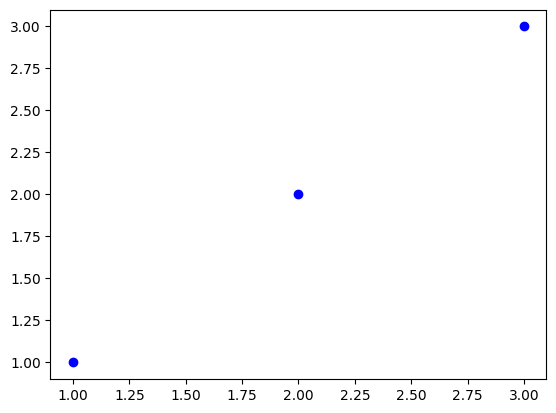

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

in_str = None
x = [1, 2, 3]
y = [1, 2, 3]

while in_str != 'Yes':
    in_str = input('Enter a string:')
    plt.clf()  # Clear the current figure
    if in_str == 'red':
        plt.scatter(x, y, c='red')
    else:
        plt.scatter(x, y, c='blue')
    clear_output(wait=True)
    display(plt.gcf())